# **IMPORTS NECESSÁRIOS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **PRÉ-PROCESSAMENTO E ANÁLISE DOS DADOS - 1**

In [3]:
path = '/content/marketing_campaign.csv'
df = pd.read_csv(path, sep='\t')
pd.set_option('display.max_columns', 29)

df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [4]:
df_sub = df.drop(columns=["ID", "Recency",'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                          'MntSweetProducts', 'AcceptedCmp3','MntGoldProds', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp2', 'AcceptedCmp1', 'Response', 'Z_CostContact', 'Z_Revenue'])
df_sub.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1957,Graduation,Single,58138.0,0,0,3,8,10,4,7,0
1,1954,Graduation,Single,46344.0,1,1,2,1,1,2,5,0
2,1965,Graduation,Together,71613.0,0,0,1,8,2,10,4,0
3,1984,Graduation,Together,26646.0,1,0,2,2,0,4,6,0
4,1981,PhD,Married,58293.0,1,0,5,5,3,6,5,0
5,1967,Master,Together,62513.0,0,1,2,6,4,10,6,0
6,1971,Graduation,Divorced,55635.0,0,1,4,7,3,7,6,0
7,1985,PhD,Married,33454.0,1,0,2,4,0,4,8,0
8,1974,PhD,Together,30351.0,1,0,1,3,0,2,9,0
9,1950,PhD,Together,5648.0,1,1,1,1,0,0,20,0


In [5]:
print("Valores únicos em Education:", df_sub['Education'].unique())
print("Valores únicos em Marital_Status:", df_sub['Marital_Status'].unique())

Valores únicos em Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Valores únicos em Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [6]:
education_mapping = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

marital_status_mapping = {
    'Single': 1,
    'Married': 2,
    'Together': 3,
    'Divorced': 4,
    'Widow': 5,
    'Alone' : 6,
    'Absurd' : 7,
    'YOLO' : 8
}

df_sub['Education'] = df_sub['Education'].map(education_mapping)
df_sub['Marital_Status'] = df_sub['Marital_Status'].map(marital_status_mapping)

print(df_sub[['Education', 'Marital_Status']].head(10))

   Education  Marital_Status
0          3               1
1          3               1
2          3               3
3          3               3
4          5               2
5          4               3
6          3               4
7          5               2
8          5               3
9          5               3


In [7]:
df_sub.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1957,3,1,58138.0,0,0,3,8,10,4,7,0
1,1954,3,1,46344.0,1,1,2,1,1,2,5,0
2,1965,3,3,71613.0,0,0,1,8,2,10,4,0
3,1984,3,3,26646.0,1,0,2,2,0,4,6,0
4,1981,5,2,58293.0,1,0,5,5,3,6,5,0
5,1967,4,3,62513.0,0,1,2,6,4,10,6,0
6,1971,3,4,55635.0,0,1,4,7,3,7,6,0
7,1985,5,2,33454.0,1,0,2,4,0,4,8,0
8,1974,5,3,30351.0,1,0,1,3,0,2,9,0
9,1950,5,3,5648.0,1,1,1,1,0,0,20,0


In [8]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   int64  
 2   Marital_Status       2240 non-null   int64  
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   NumDealsPurchases    2240 non-null   int64  
 7   NumWebPurchases      2240 non-null   int64  
 8   NumCatalogPurchases  2240 non-null   int64  
 9   NumStorePurchases    2240 non-null   int64  
 10  NumWebVisitsMonth    2240 non-null   int64  
 11  Complain             2240 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 210.1 KB


In [9]:
df_sub.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2240.000000,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,3.460268,2.370089,52247.251354,0.444196,0.506250,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375
std,11.984069,1.004337,1.065978,25173.076661,0.538398,0.544538,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391
min,1893.000000,1.000000,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,3.000000,2.000000,35303.000000,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,3.000000,2.000000,51381.500000,0.000000,0.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,4.000000,3.000000,68522.000000,1.000000,1.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1996.000000,5.000000,8.000000,666666.000000,2.000000,2.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


In [10]:
from datetime import datetime
year = datetime.today().year
age= year - df_sub['Year_Birth']
df_sub['Age'] = age


df_sub_2 = df_sub.drop(columns=['Year_Birth'])
df_sub_2.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age
0,3,1,58138.0,0,0,3,8,10,4,7,0,67
1,3,1,46344.0,1,1,2,1,1,2,5,0,70
2,3,3,71613.0,0,0,1,8,2,10,4,0,59
3,3,3,26646.0,1,0,2,2,0,4,6,0,40
4,5,2,58293.0,1,0,5,5,3,6,5,0,43


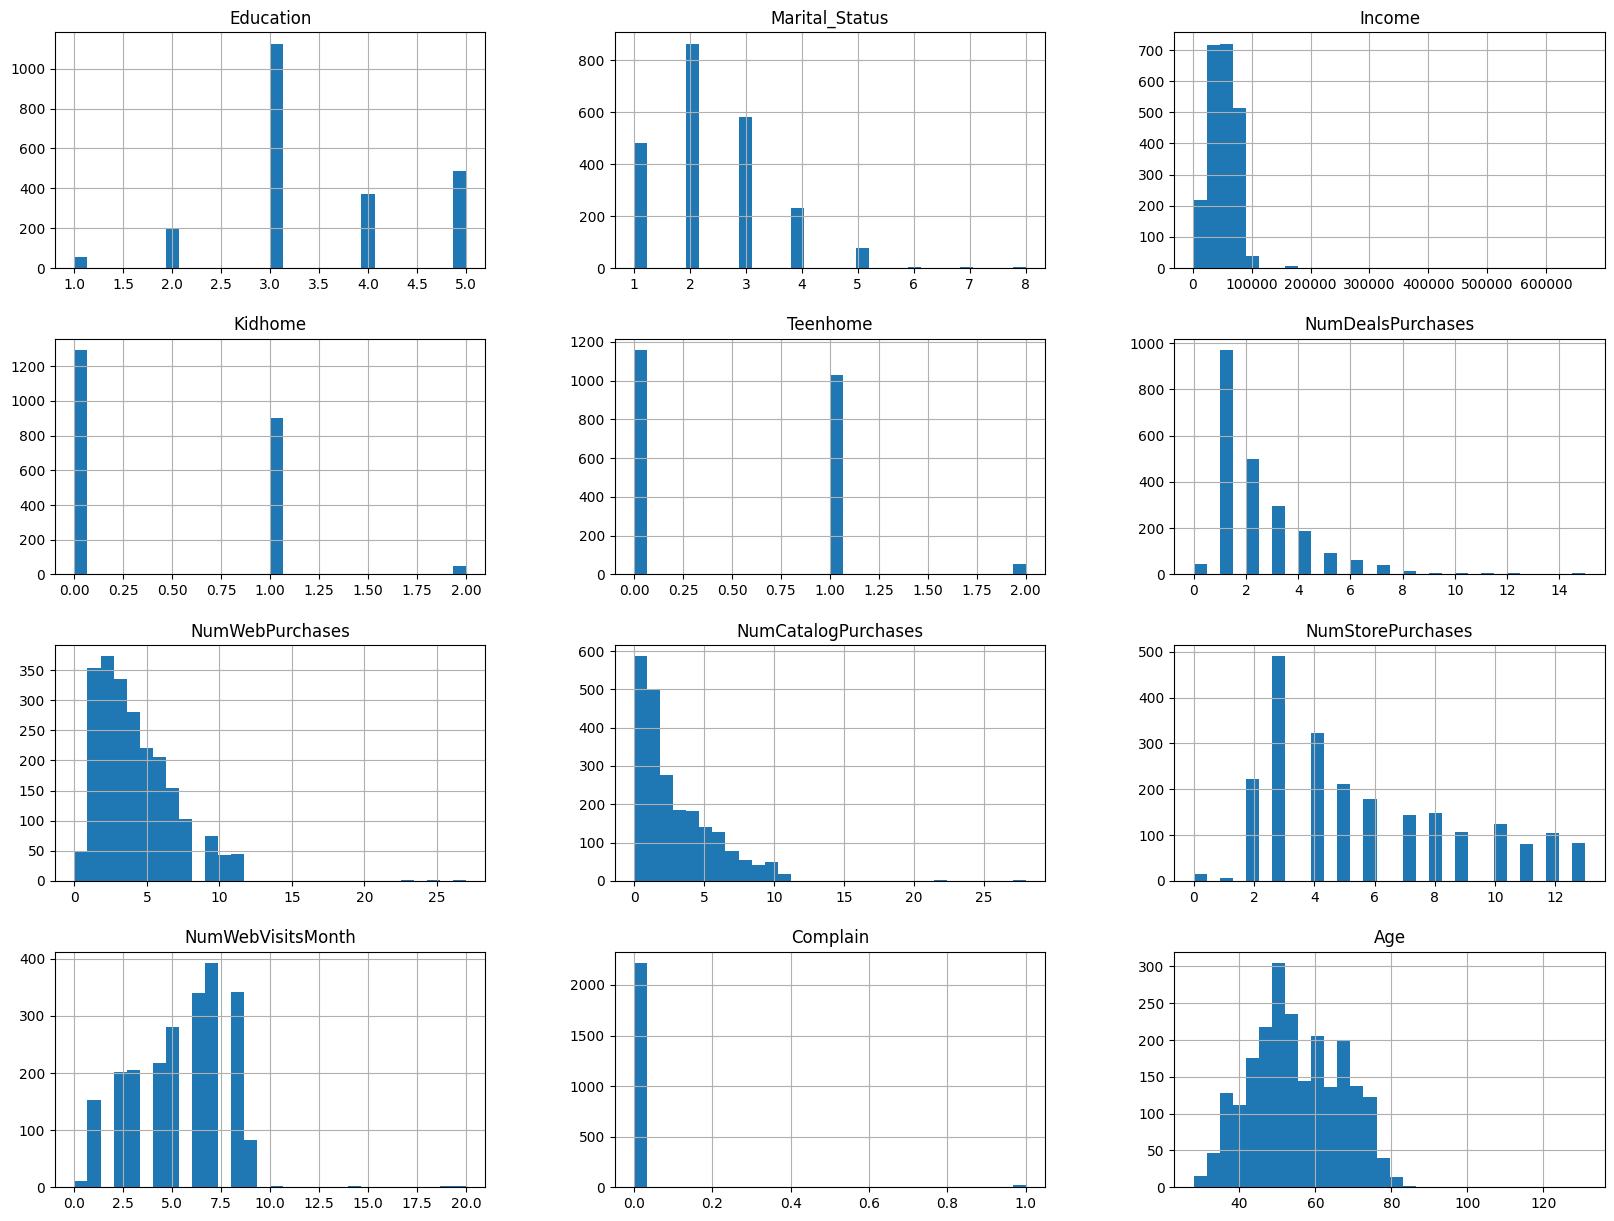

In [11]:
df_sub_2.hist(bins=30, figsize=(20, 15))
plt.show()

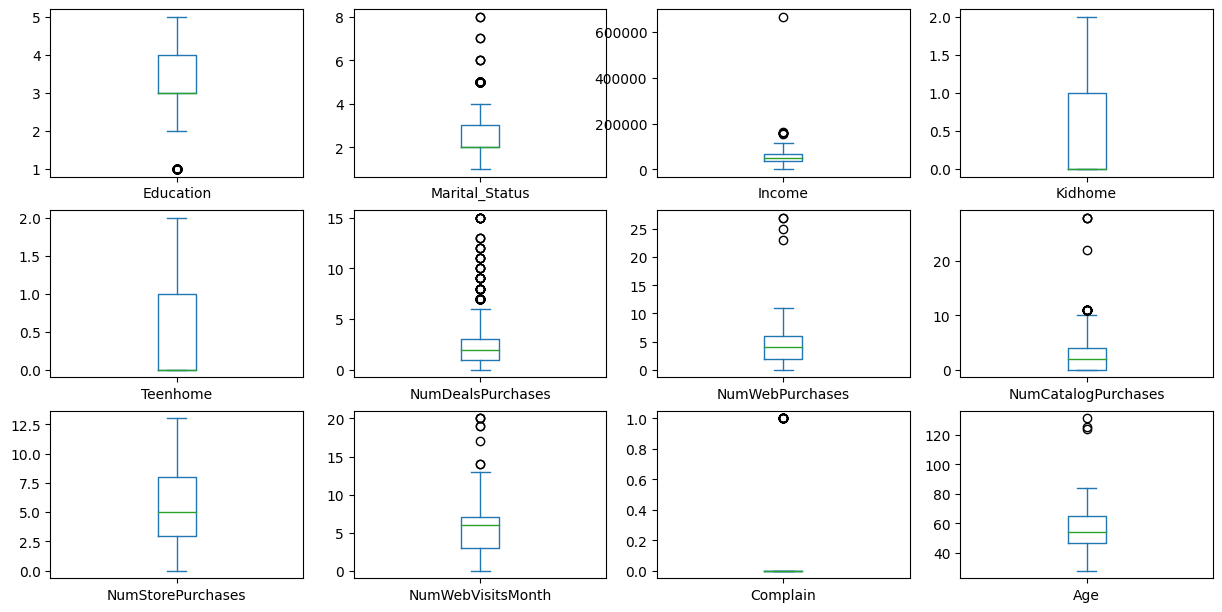

In [12]:
df_sub_2.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

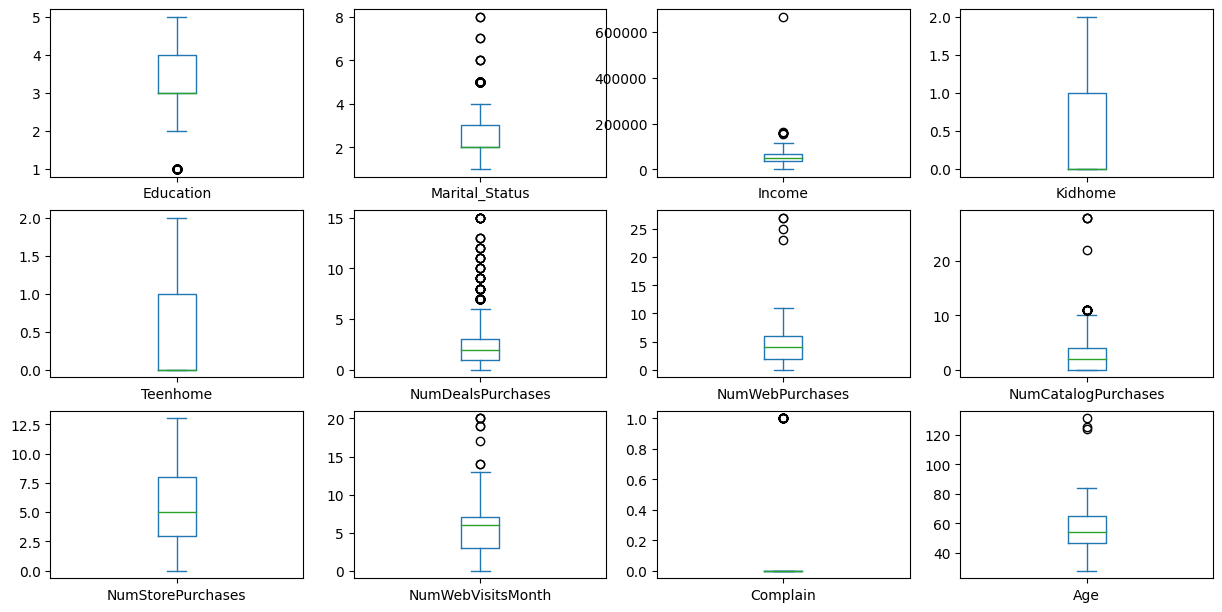

In [13]:
df_sub_2.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

In [14]:
df_sub_2.query("Income > 140000")

,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age
164,5,2,157243.0,0,1,15,0,22,0,0,0,51
617,5,3,162397.0,1,1,0,0,0,1,1,0,48
655,3,4,153924.0,0,0,0,0,0,0,0,0,49
687,5,2,160803.0,0,0,15,0,28,1,0,0,42
1300,4,3,157733.0,1,0,0,1,0,1,1,0,53
1653,3,3,157146.0,0,0,0,0,28,0,1,0,47
2132,5,2,156924.0,0,0,0,0,0,0,0,0,75
2233,3,3,666666.0,1,0,4,3,1,3,6,0,47


In [15]:
df_sub_3 = df_sub_2.drop([164,617,655,687,1300,1653,2132,2233])

In [16]:
df_sub_3.isnull().sum()

,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
NumDealsPurchases,0
NumWebPurchases,0
NumCatalogPurchases,0
NumStorePurchases,0
NumWebVisitsMonth,0


In [17]:
df_sub_3['Income'].fillna(df_sub_3['Income'].mean(), inplace = True)

<ipython-input-17-ac2736407575>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sub_3['Income'].fillna(df_sub_3['Income'].mean(), inplace = True)


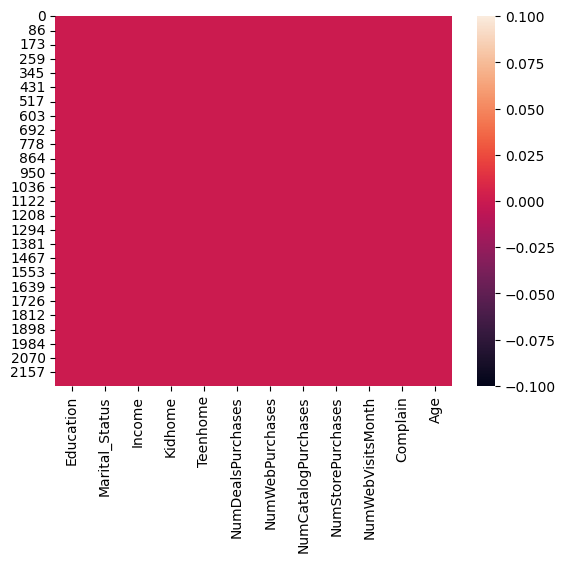

In [18]:
sns.heatmap(df_sub_3.isnull());

In [19]:
grafico = px.box(df_sub_3, y='Age')
grafico.show()

In [20]:
df_sub_3.loc[df_sub_3['Age'] > 81]

,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age
192,2,4,36640.0,1,0,1,2,1,2,5,1,124
239,2,1,60182.0,0,1,1,1,0,2,4,0,131
339,5,3,83532.0,0,0,1,4,6,4,1,0,125
424,5,2,93027.0,0,0,0,7,10,5,2,0,83
1950,5,1,51141.0,0,0,1,3,1,4,5,0,84


In [21]:
df_sub_4 = df_sub_3.drop([192,239,339])

In [22]:
df_sub_4['Young'] = df_sub_4.apply(lambda x: x['Teenhome'] + x['Kidhome'], axis=1)
df_test = df_sub_4.drop(columns=['Kidhome',	'Teenhome'])
df_test.head(2)

,Education,Marital_Status,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Young
0,3,1,58138.0,3,8,10,4,7,0,67,0.0
1,3,1,46344.0,2,1,1,2,5,0,70,2.0


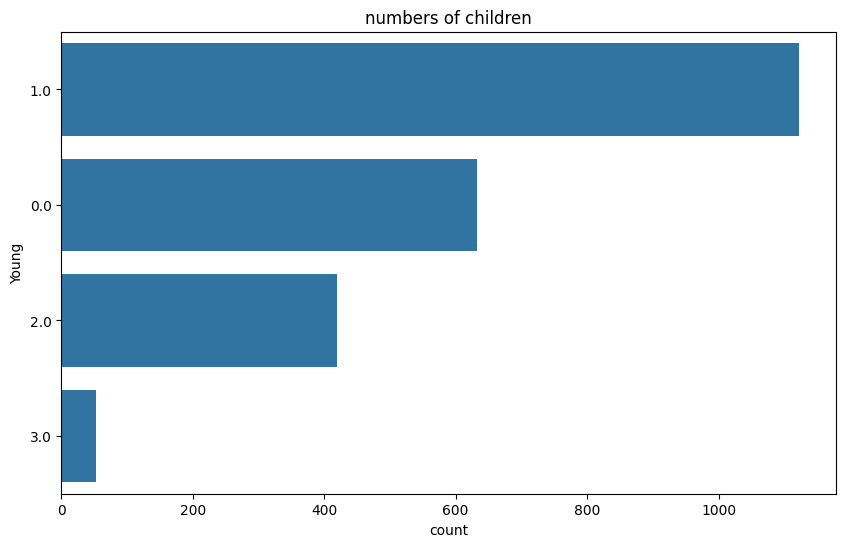

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(y="Young", data=df_test, order=df_test["Young"].value_counts().index)
plt.title("numbers of children");

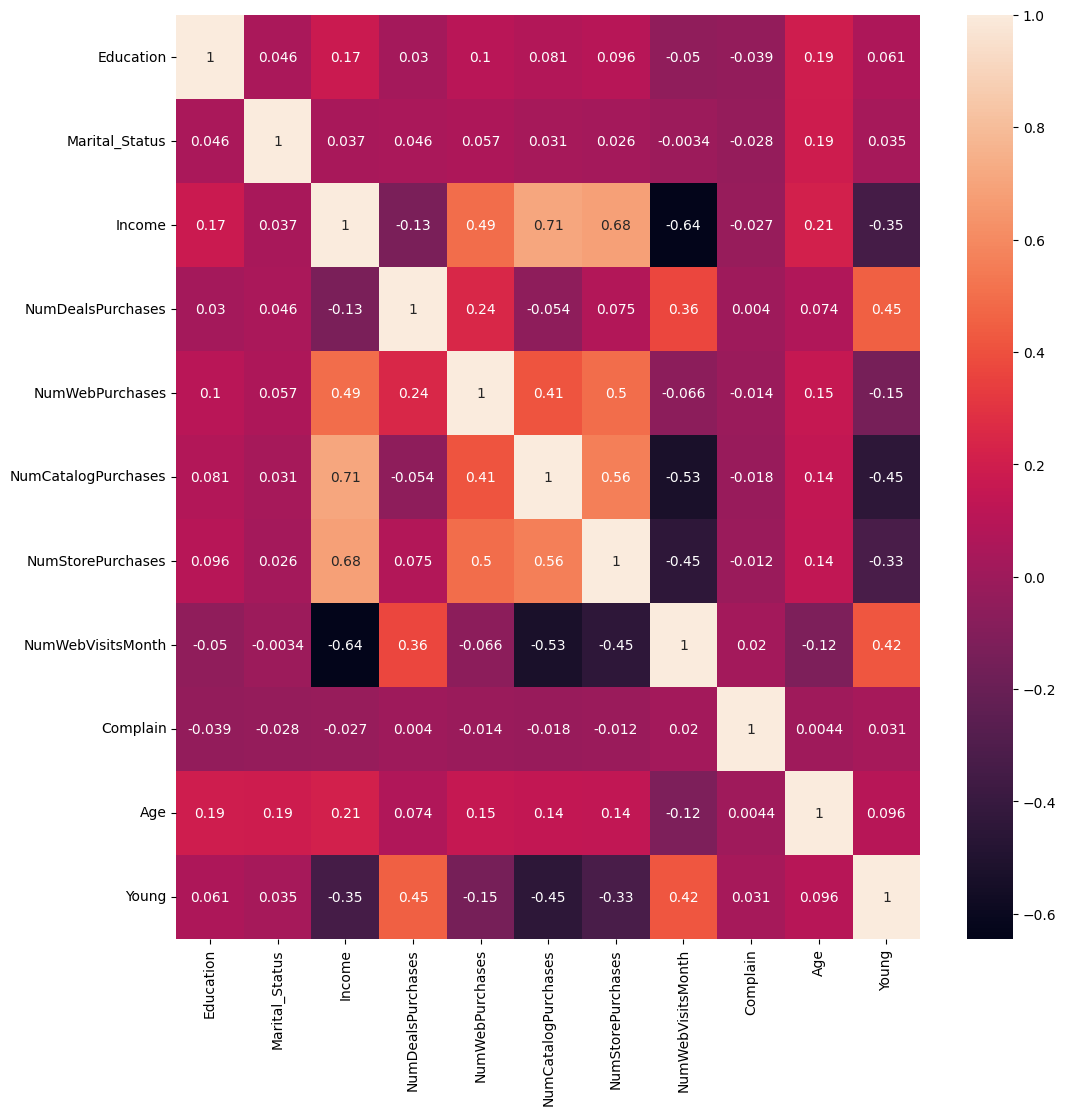

In [24]:
correlations = df_test.corr()
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(correlations, annot=True)
correlations.round(2);

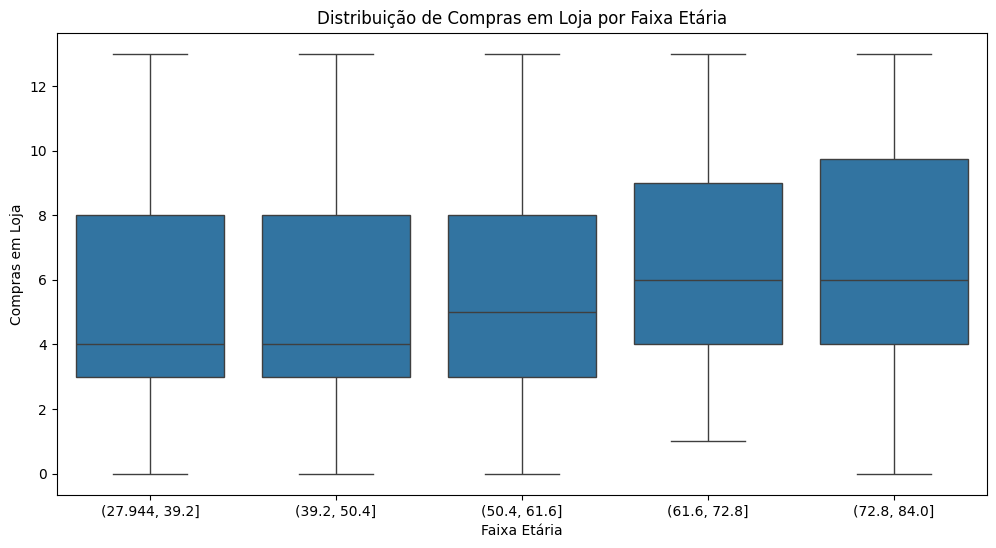

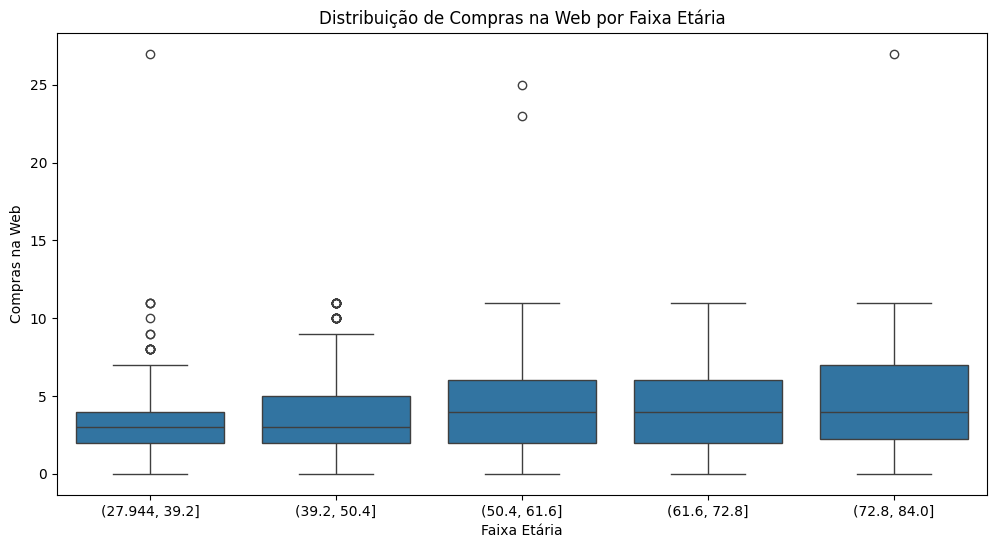

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(df_test['Age'], bins=5), y='NumStorePurchases', data=df_test)
plt.title('Distribuição de Compras em Loja por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Compras em Loja')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(df_test['Age'], bins=5), y='NumWebPurchases', data=df_test)
plt.title('Distribuição de Compras na Web por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Compras na Web')
plt.show()

In [26]:
age_bins = pd.cut(df_test['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])
store_purchases_by_age = df_test.groupby(age_bins)['NumStorePurchases'].mean()
web_purchases_by_age = df_test.groupby(age_bins)['NumWebPurchases'].mean()

print("Média de Compras em Loja por Faixa Etária:")
print(store_purchases_by_age)

print("\nMédia de Compras na Web por Faixa Etária:")
print(web_purchases_by_age)

Média de Compras em Loja por Faixa Etária:
Age
(20, 30]    6.900000
(30, 40]    5.281124
(40, 50]    5.437393
(50, 60]    5.635240
(60, 70]    6.334737
(70, 80]    6.546875
(80, 90]    7.888889
Name: NumStorePurchases, dtype: float64

Média de Compras na Web por Faixa Etária:
Age
(20, 30]    3.300000
(30, 40]    3.309237
(40, 50]    3.833619
(50, 60]    4.174652
(60, 70]    4.456842
(70, 80]    4.593750
(80, 90]    5.888889
Name: NumWebPurchases, dtype: float64


<ipython-input-26-abee53c62e36>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-26-abee53c62e36>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [27]:
# Agrupar por Marital_Status e calcular a média de NumStorePurchases
store_purchases_by_marital_status = df_test.groupby('Marital_Status')['NumStorePurchases'].mean()

# Agrupar por Marital_Status e calcular a média de NumWebPurchases
web_purchases_by_marital_status = df_test.groupby('Marital_Status')['NumWebPurchases'].mean()

# Exibir os resultados
print("Média de Compras em Loja por Estado Civil:")
print(store_purchases_by_marital_status)

print("\nMédia de Compras na Web por Estado Civil:")
print(web_purchases_by_marital_status)

Média de Compras em Loja por Estado Civil:
Marital_Status
1    5.647182
2    5.869919
3    5.770435
4    5.860870
5    6.415584
6    4.000000
7    6.500000
8    6.000000
Name: NumStorePurchases, dtype: float64

Média de Compras na Web por Estado Civil:
Marital_Status
1    3.878914
2    4.102207
3    4.102609
4    4.339130
5    4.623377
6    5.000000
7    3.500000
8    7.000000
Name: NumWebPurchases, dtype: float64


<ipython-input-28-e0520a2121d0>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




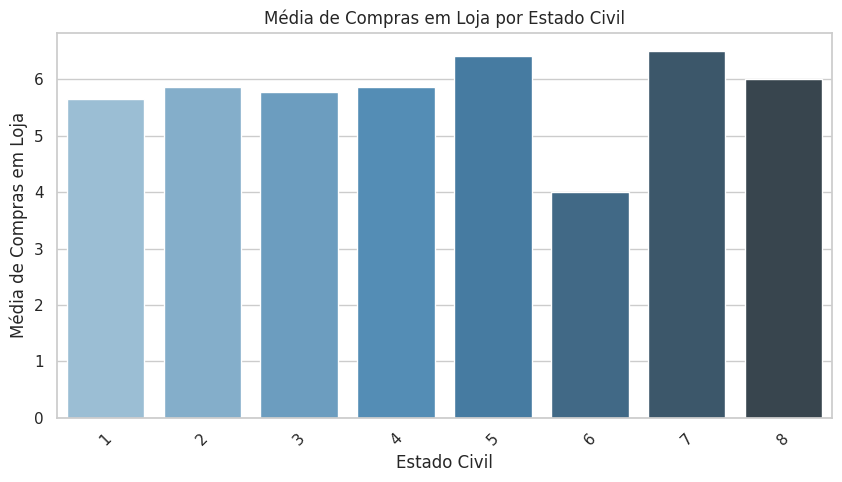

<ipython-input-28-e0520a2121d0>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




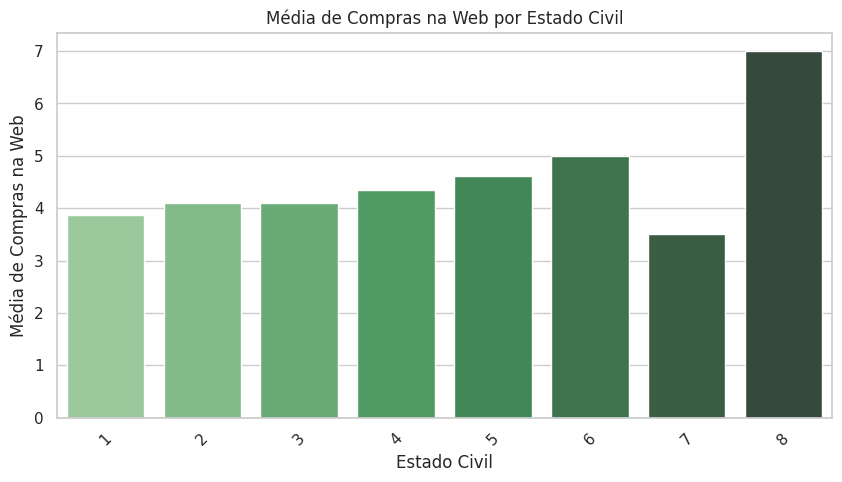

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar um DataFrame para facilitar a plotagem
df_grouped = df_test.groupby('Marital_Status').agg({
    'NumStorePurchases': 'mean',
    'NumWebPurchases': 'mean'
}).reset_index()

# Gráfico de barras para NumStorePurchases por Marital_Status
plt.figure(figsize=(10, 5))
sns.barplot(x='Marital_Status', y='NumStorePurchases', data=df_grouped, palette='Blues_d')
plt.title('Média de Compras em Loja por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Média de Compras em Loja')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para NumWebPurchases por Marital_Status
plt.figure(figsize=(10, 5))
sns.barplot(x='Marital_Status', y='NumWebPurchases', data=df_grouped, palette='Greens_d')
plt.title('Média de Compras na Web por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Média de Compras na Web')
plt.xticks(rotation=45)
plt.show()

# **PRÉ-PROCESSAMENTO E ANÁLISE DOS DADOS - 2**

<ipython-input-29-c8e27c94c98c>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-29-c8e27c94c98c>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




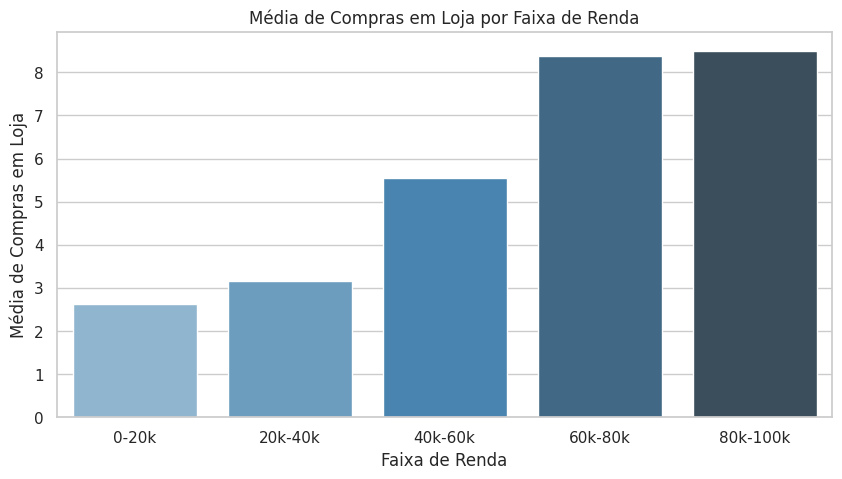

<ipython-input-29-c8e27c94c98c>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




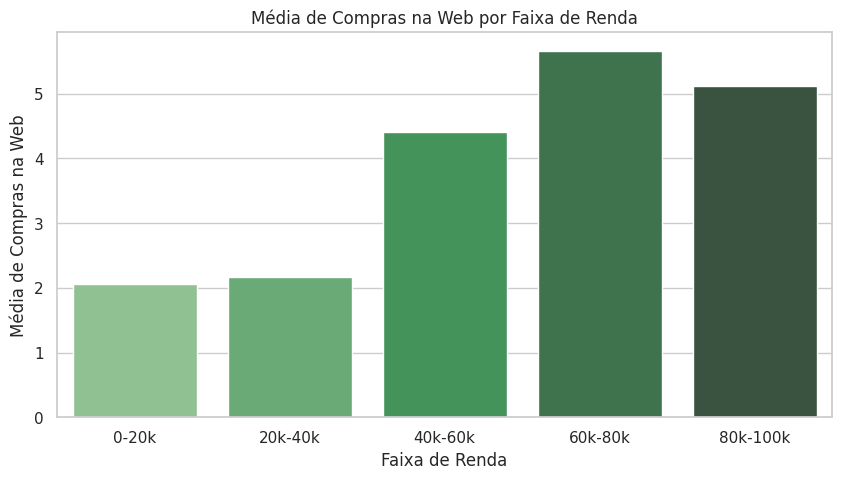

In [29]:
# Criar faixas de renda
bins = [0, 20000, 40000, 60000, 80000, 100000]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k']
df_test['Income_Group'] = pd.cut(df_test['Income'], bins=bins, labels=labels, right=False)

# Calcular a média de compras para cada faixa de renda
income_grouped = df_test.groupby('Income_Group').agg({
    'NumStorePurchases': 'mean',
    'NumWebPurchases': 'mean'
}).reset_index()

# Gráfico de barras para NumStorePurchases por faixa de renda
plt.figure(figsize=(10, 5))
sns.barplot(x='Income_Group', y='NumStorePurchases', data=income_grouped, palette='Blues_d')
plt.title('Média de Compras em Loja por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média de Compras em Loja')
plt.show()

# Gráfico de barras para NumWebPurchases por faixa de renda
plt.figure(figsize=(10, 5))
sns.barplot(x='Income_Group', y='NumWebPurchases', data=income_grouped, palette='Greens_d')
plt.title('Média de Compras na Web por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média de Compras na Web')
plt.show()

<ipython-input-30-1a00dfecf3cf>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




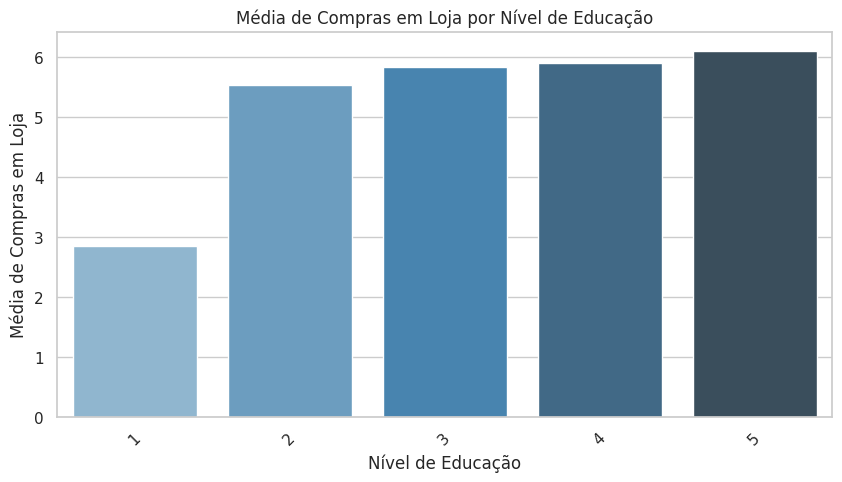

<ipython-input-30-1a00dfecf3cf>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




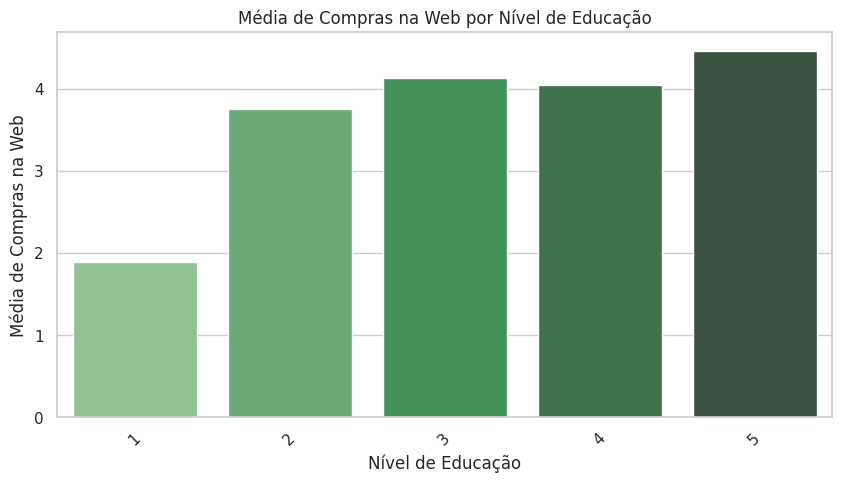

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_test seja o seu DataFrame
# Calcular a média de compras para cada nível de educação
education_grouped = df_test.groupby('Education').agg({
    'NumStorePurchases': 'mean',
    'NumWebPurchases': 'mean'
}).reset_index()

# Gráfico de barras para NumStorePurchases por nível de educação
plt.figure(figsize=(10, 5))
sns.barplot(x='Education', y='NumStorePurchases', data=education_grouped, palette='Blues_d')
plt.title('Média de Compras em Loja por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Média de Compras em Loja')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para NumWebPurchases por nível de educação
plt.figure(figsize=(10, 5))
sns.barplot(x='Education', y='NumWebPurchases', data=education_grouped, palette='Greens_d')
plt.title('Média de Compras na Web por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Média de Compras na Web')
plt.xticks(rotation=45)
plt.show()

<ipython-input-31-da155be2c6ae>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




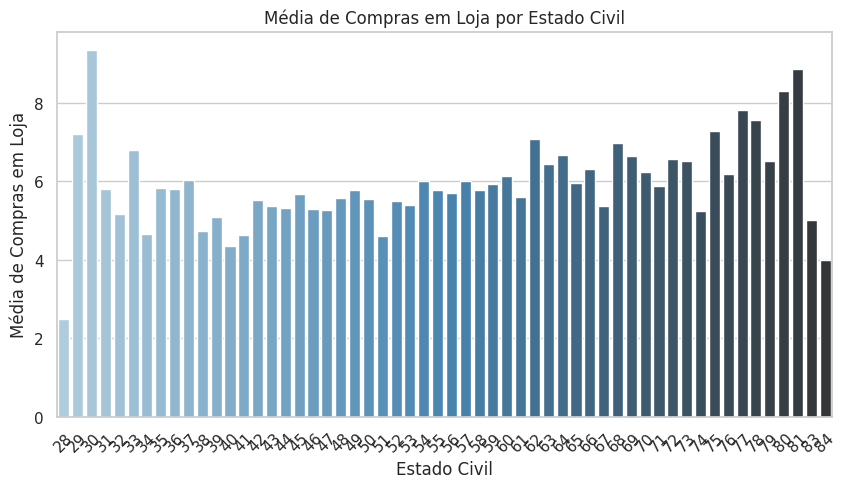

<ipython-input-31-da155be2c6ae>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




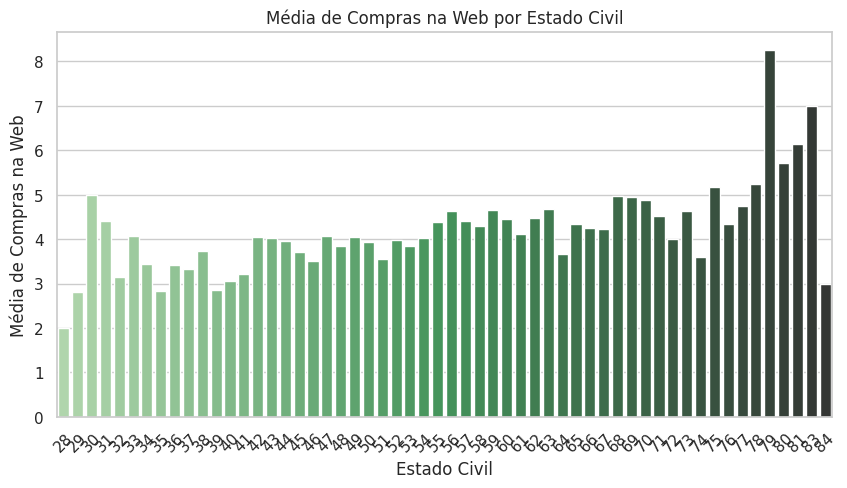

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar um DataFrame para facilitar a plotagem
df_grouped = df_test.groupby('Age').agg({
    'NumStorePurchases': 'mean',
    'NumWebPurchases': 'mean'
}).reset_index()

# Gráfico de barras para NumStorePurchases por Age
plt.figure(figsize=(10, 5))
sns.barplot(x='Age', y='NumStorePurchases', data=df_grouped, palette='Blues_d')
plt.title('Média de Compras em Loja por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Média de Compras em Loja')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para NumWebPurchases por Age
plt.figure(figsize=(10, 5))
sns.barplot(x='Age', y='NumWebPurchases', data=df_grouped, palette='Greens_d')
plt.title('Média de Compras na Web por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Média de Compras na Web')
plt.xticks(rotation=45)
plt.show()

In [32]:
import pandas as pd

# Definir os limites dos bins e os rótulos correspondentes
bins = [18, 30, 55, 80, 100]
labels = [1, 2, 3, 4]  # Usando números para representar os grupos de idade

# Criar a coluna 'Age_Group' com valores numéricos
df_test['Age_Group'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)

# Converter para tipo numérico, preenchendo NaNs com um valor padrão
df_test['Age_Group'] = df_test['Age_Group'].cat.add_categories([0]).fillna(0).astype(int)

# Verificar o resultado
print(df_test[['Age', 'Age_Group']].head(20))

    Age  Age_Group
0    67          3
1    70          3
2    59          3
3    40          2
4    43          2
5    57          3
6    53          2
7    39          2
8    50          2
9    74          3
10   41          2
11   48          2
12   65          3
13   72          3
14   37          2
15   78          3
16   44          2
17   78          3
18   75          3
19   39          2


In [33]:
import pandas as pd

# Definir os limites dos bins e os rótulos numéricos correspondentes
bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
labels = [1, 2, 3, 4, 5, 6]  # Incluindo um rótulo adicional para valores acima de 100k

# Criar a coluna 'Income_Group' com valores numéricos
df_test['Income_Group'] = pd.cut(df_test['Income'], bins=bins, labels=labels, right=False)

# Converter a coluna 'Income_Group' para tipo float para lidar com NaNs
df_test['Income_Group'] = df_test['Income_Group'].astype(float)

# Preencher NaNs com um valor padrão, se necessário
df_test['Income_Group'] = df_test['Income_Group'].fillna(0).astype(int)

# Verificar o resultado
print(df_test[['Income', 'Income_Group']].head(20))

          Income  Income_Group
0   58138.000000             3
1   46344.000000             3
2   71613.000000             4
3   26646.000000             2
4   58293.000000             3
5   62513.000000             4
6   55635.000000             3
7   33454.000000             2
8   30351.000000             2
9    5648.000000             1
10  51633.638134             3
11   7500.000000             1
12  63033.000000             4
13  59354.000000             3
14  17323.000000             1
15  82800.000000             5
16  41850.000000             3
17  37760.000000             2
18  76995.000000             4
19  33812.000000             2


In [34]:
# Criar novas features
df_test['TotalPurchases'] = df_test['NumWebPurchases'] + df_test['NumStorePurchases']
df_test['WebToStoreRatio'] = df_test['NumWebPurchases'] / (df_test['NumStorePurchases'] + 1)  # +1 para evitar divisão por zero
print(df_test[['NumWebPurchases', 'NumStorePurchases', 'TotalPurchases', 'WebToStoreRatio']].head())

   NumWebPurchases  NumStorePurchases  TotalPurchases  WebToStoreRatio
0                8                  4              12         1.600000
1                1                  2               3         0.333333
2                8                 10              18         0.727273
3                2                  4               6         0.400000
4                5                  6              11         0.714286


# **DATASET FINAL**

In [37]:
df_test.head(20)

,Education,Marital_Status,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Young,Income_Group,Age_Group,TotalPurchases,WebToStoreRatio
0,3,1,58138.000000,3,8,10,4,7,0,67,0.0,3,3,12,1.600000
1,3,1,46344.000000,2,1,1,2,5,0,70,2.0,3,3,3,0.333333
2,3,3,71613.000000,1,8,2,10,4,0,59,0.0,4,3,18,0.727273
3,3,3,26646.000000,2,2,0,4,6,0,40,1.0,2,2,6,0.400000
4,5,2,58293.000000,5,5,3,6,5,0,43,1.0,3,2,11,0.714286
5,4,3,62513.000000,2,6,4,10,6,0,57,1.0,4,3,16,0.545455
6,3,4,55635.000000,4,7,3,7,6,0,53,1.0,3,2,14,0.875000
7,5,2,33454.000000,2,4,0,4,8,0,39,1.0,2,2,8,0.800000
8,5,3,30351.000000,1,3,0,2,9,0,50,1.0,2,2,5,1.000000
9,5,3,5648.000000,1,1,0,0,20,0,74,2.0,1,3,1,1.000000


# **MACHINE LEARNING DE PREDIÇÃO DE COMPRAS**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Supondo que 'df_test' seja o seu DataFrame e 'target' a coluna alvo
X = df_test.drop('NumStorePurchases', axis=1)
y = df_test['NumStorePurchases']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[12:47:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Confusion Matrix:
[[  3   1   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  61   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 139   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  99   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2  74   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  50   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2  44   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  40   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1  29   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  41   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  27   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  26   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2  25]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
      

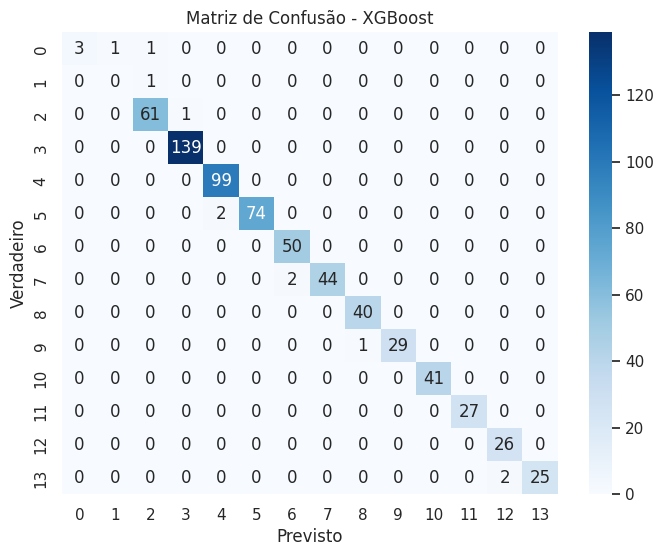

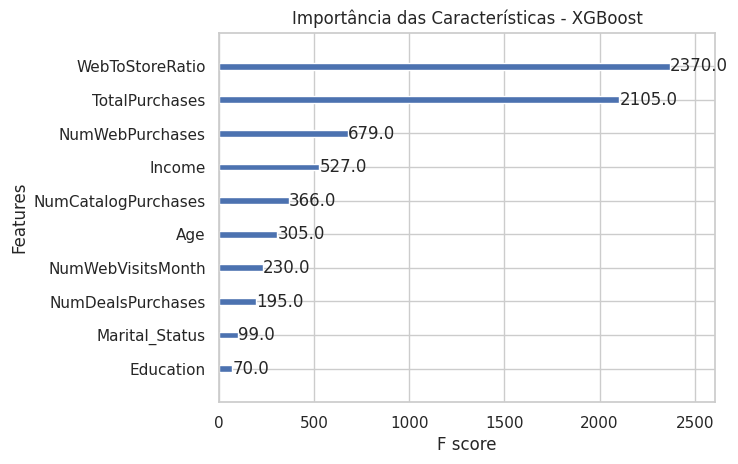

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' seja o seu DataFrame
X = df_test.drop('NumStorePurchases', axis=1)
y = df_test['NumStorePurchases']

# Converter colunas categóricas em numéricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Usar OneHotEncoder para colunas categóricas
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Reindexar as classes antes de dividir os dados
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Ajustar o modelo XGBoost
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.8,
    gamma=0.2,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=50,
    subsample=1.0,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Treinar o modelo
xgb_model.fit(X_train, y_train_encoded)

# Fazer previsões
y_pred_xgb = xgb_model.predict(X_test)

# Avaliar o modelo
print("XGBoost Confusion Matrix:")
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)
print(conf_matrix)
print("\nXGBoost Classification Report:")
print(classification_report(y_test_encoded, y_pred_xgb))

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Importância das Características
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('Importância das Características - XGBoost')
plt.show()

# **MACHINE LEARNING DE CLASSIFICAÇÃO POR GRUPOS**

In [128]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir o número de clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar o modelo
kmeans.fit(X_scaled)

# Obter os rótulos dos clusters
clusters_kmeans = kmeans.labels_

# Adicionar os rótulos ao DataFrame
df_test['Cluster_KMeans'] = clusters_kmeans

# Visualizar os resultados
print(df_test[['NumWebPurchases', 'Cluster_KMeans']].head(20))

    NumWebPurchases  Cluster_KMeans
0                 8               2
1                 1               0
2                 8               2
3                 2               0
4                 5               1
5                 6               2
6                 7               1
7                 4               0
8                 3               0
9                 1               0
10                1               0
11                2               0
12                3               2
13                6               2
14                1               0
15                7               2
16                3               0
17                4               2
18               11               2
19                2               0


In [129]:
print(df_test['Cluster_KMeans'].value_counts())

Cluster_KMeans
0    1032
2     726
1     471
Name: count, dtype: int64


In [130]:
cluster_summary = df_test.groupby('Cluster_KMeans').mean()
print(cluster_summary)

                Education  Marital_Status        Income  NumDealsPurchases  \
Cluster_KMeans                                                               
0                3.292636        2.281977  34074.407263           2.274225   
1                3.505308        2.233546  69451.150561           2.112527   
2                3.663912        2.578512  64999.512541           2.519284   

                NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Cluster_KMeans                                                            
0                      2.210271             0.552326           3.295543   
1                      5.728238             4.753715           8.409766   
2                      5.730028             4.225895           7.705234   

                NumWebVisitsMonth  Complain        Age     Young  \
Cluster_KMeans                                                     
0                        6.644380  0.011628  51.722868  1.280039   
1                        3.90

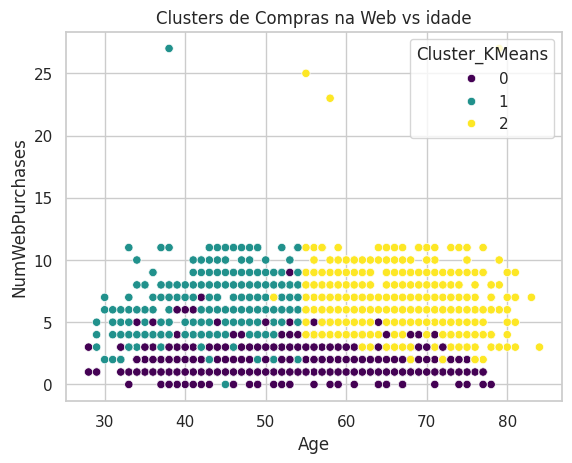

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_test, x='Age', y='NumWebPurchases', hue='Cluster_KMeans', palette='viridis')
plt.title('Clusters de Compras na Web vs idade')
plt.show()

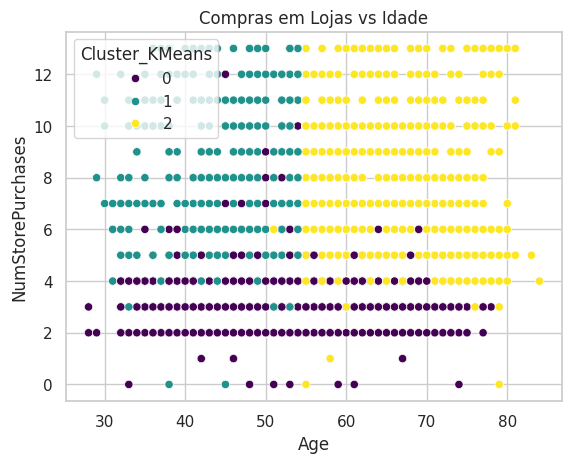

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_test, x='Age', y='NumStorePurchases', hue='Cluster_KMeans', palette='viridis')
plt.title('Compras em Lojas vs Idade')
plt.show()

In [133]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, clusters_kmeans)
print(f"Coeficiente de Silhueta: {silhouette_avg}")

Coeficiente de Silhueta: 0.20895925331755283


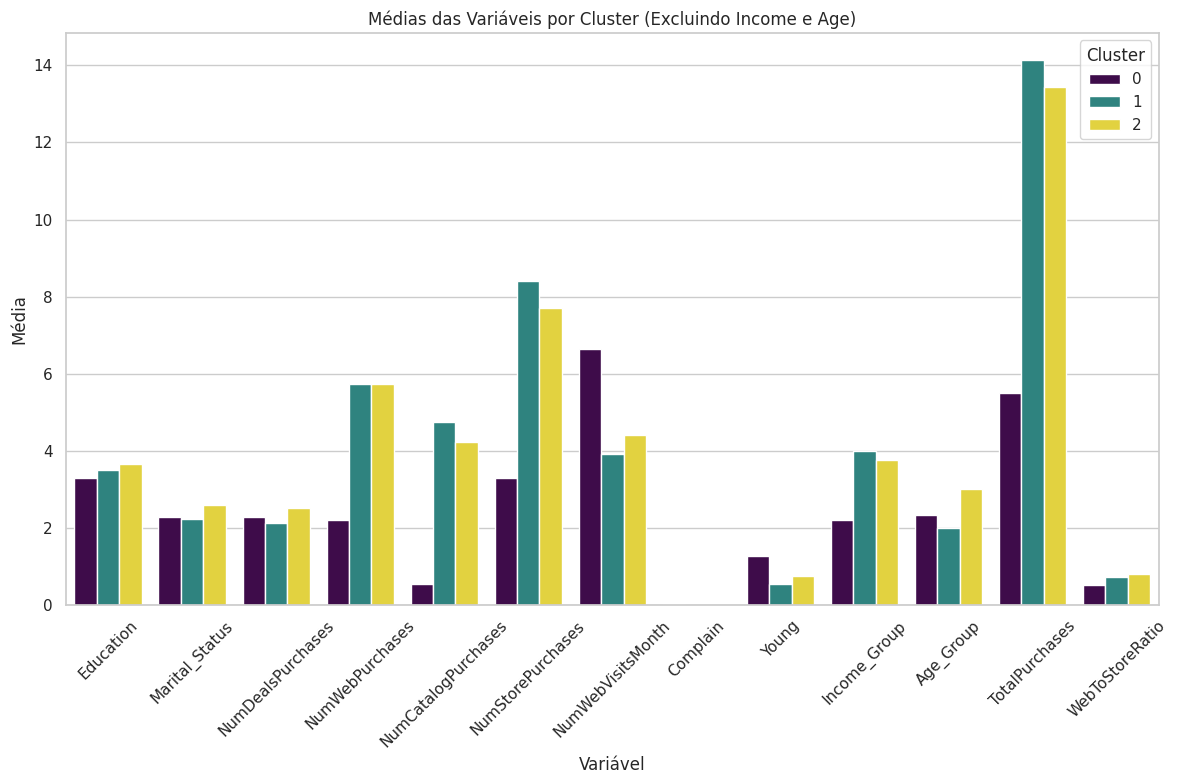

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df_test' seja o seu DataFrame com os clusters já definidos
# Calcular as médias de cada variável por cluster
cluster_summary = df_test.groupby('Cluster_KMeans').mean()

# Remover a coluna 'Income' do resumo
cluster_summary = cluster_summary.drop(columns=['Income', 'Age'])

# Resetar o índice para facilitar a plotagem
cluster_summary = cluster_summary.reset_index()

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar um gráfico de barras para cada variável
cluster_summary_melted = cluster_summary.melt(id_vars='Cluster_KMeans', var_name='Variável', value_name='Média')

plt.figure(figsize=(12, 8))
sns.barplot(data=cluster_summary_melted, x='Variável', y='Média', hue='Cluster_KMeans', palette='viridis')

# Ajustar o título e os rótulos
plt.title('Médias das Variáveis por Cluster (Excluindo Income e Age)')
plt.xticks(rotation=45)
plt.xlabel('Variável')
plt.ylabel('Média')
plt.legend(title='Cluster')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

<ipython-input-135-35144f11b6f0>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




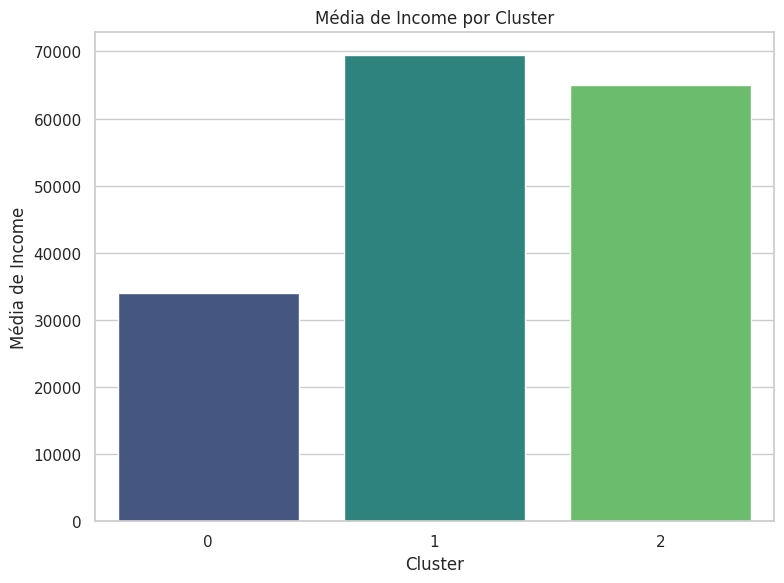

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df_test' seja o seu DataFrame com os clusters já definidos
# Calcular as médias de 'Income' por cluster
income_summary = df_test.groupby('Cluster_KMeans')['Income'].mean().reset_index()

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar um gráfico de barras para 'Income'
plt.figure(figsize=(8, 6))
sns.barplot(data=income_summary, x='Cluster_KMeans', y='Income', palette='viridis')

# Ajustar o título e os rótulos
plt.title('Média de Income por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média de Income')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

<ipython-input-136-11a410b5e901>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




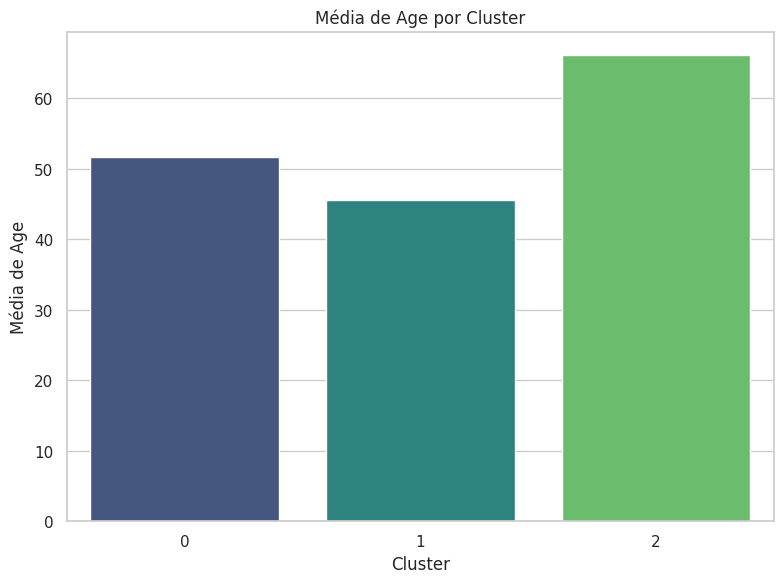

In [136]:
# Calcular as médias de 'Age' por cluster
age_summary = df_test.groupby('Cluster_KMeans')['Age'].mean().reset_index()

# Criar um gráfico de barras para 'Age'
plt.figure(figsize=(8, 6))
sns.barplot(data=age_summary, x='Cluster_KMeans', y='Age', palette='viridis')

# Ajustar o título e os rótulos
plt.title('Média de Age por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média de Age')

# Mostrar o gráfico
plt.tight_layout()
plt.show()